# 第14届Python A组

### 试题 A: 排列字母（5分）

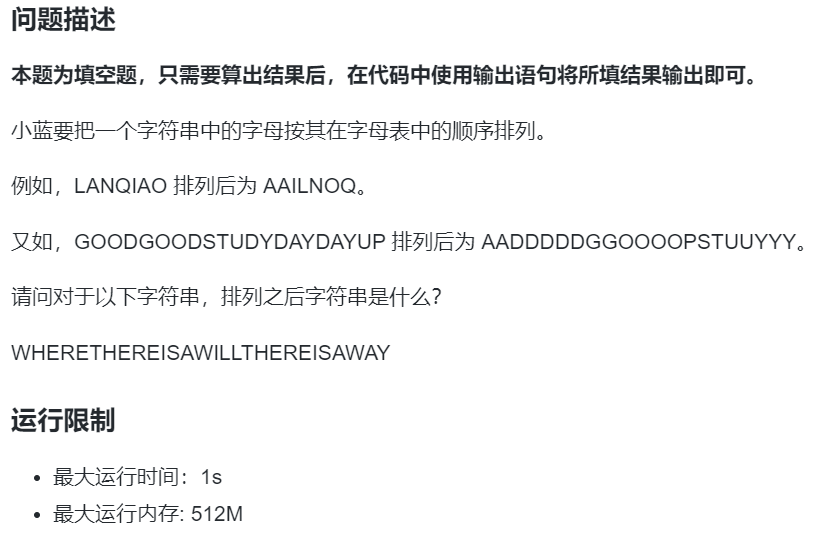

**题目答案：**
> AAAEEEEEEHHHIIILLRRRSSTTWWWY

**要点：**
> 在python中字符串排序默认比较字典序，sorted()接收一个可迭代对象，比较后将排序结果存入一个列表中返回

In [ ]:
s = 'WHERETHEREISAWILLTHEREISAWAY'
print(''.join(sorted(s)))

### 试题 B: 寻找整数（5分）

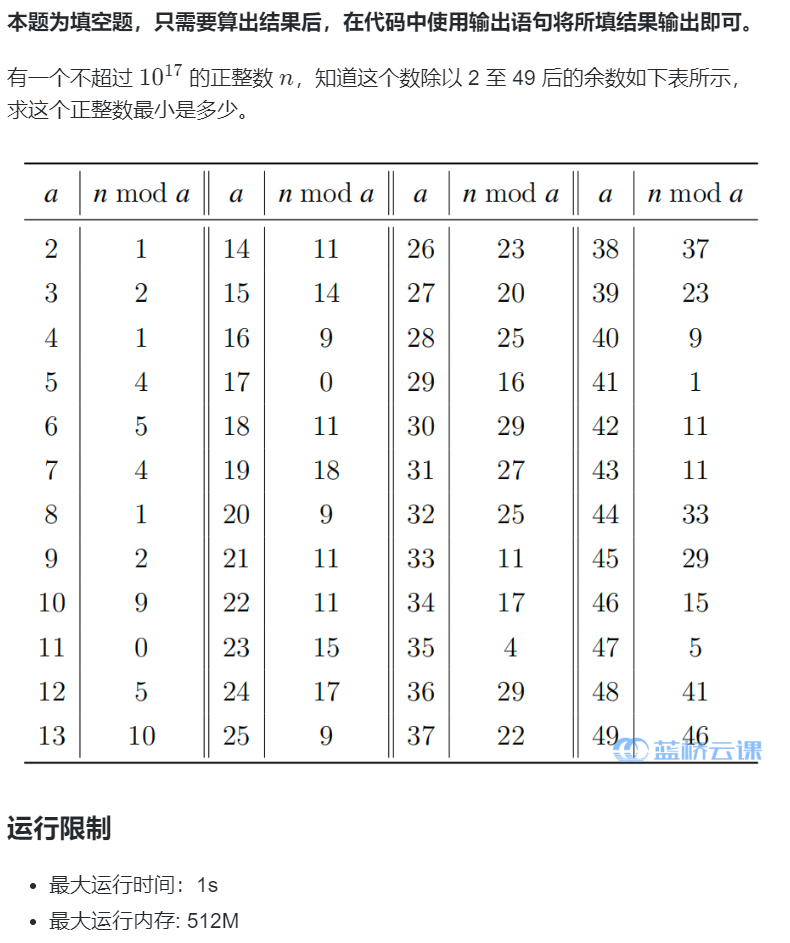

**题目答案：**
> 2022040920220409

**要点：**
> 题目中给出较多条件，可以初步判定应当以11*17为步长搜索目标数字，但直接暴力求解仍会出现超时。事实上，187并不是最佳的搜索步长，我们可以先对后几个条件进行检测，找出两个解后相减即可得到一个更为高效的步长，因为后面几个数字的值更大，所以有利于找到最优步长，降低后续搜索的时间复杂度。

In [ ]:
# 直接暴力求法
getM = [0,0,1,2,1,4,5,4,1,2,9,0,5,10,11,14,9,0,11,18,9,11,11,15,17,9,23,20,25,16,29,27,25,11,17,4,29,22,37,23,9,1,11,11,33,29,15,5,41,46]
# n是11和17的公倍数
# n不是2的倍数，说明n是奇数
m = 1
base = 11*17
notAns = True
temp = 0
while notAns:
    temp = base*m
    # check temp number is valid or not
    for i in range(3,50):
        if temp%i != getM[i]:
           # failed
           break
        elif i == 49:
            notAns = False
            print(temp)
            break
    # reflash
    m += 2

In [ ]:
# 分段暴力求法
# 先使用后几个较大的除数求出两个解，然后将这两个解的差作为步长继续搜索别的条件
# 原理：
getM = [0,0,1,2,1,4,5,4,1,2,9,0,5,10,11,14,9,0,11,18,9,11,11,15,17,9,23,20,25,16,29,27,25,11,17,4,29,22,37,23,9,1,11,11,33,29,15,5,41,46]
# n是11和17的公倍数
# 第一轮筛选的步长是11*17
step = 11*17
counter = 0
p = []
for i in range(187,10**17,step):
    for j in range(44,50):
        if i%j != getM[j]:
            break
        else:
            if j == 49:
                p.append(i)
                counter += 1
    if counter == 2:
        break
step = p[1] - p[0]
for i in range(p[0], 10**17, step):
    for j in range(2,44):
        if i%j != getM[j]:
            break
    else:
        if j == 43:
            print(i)

### 试题 C：纸张尺寸（10分）

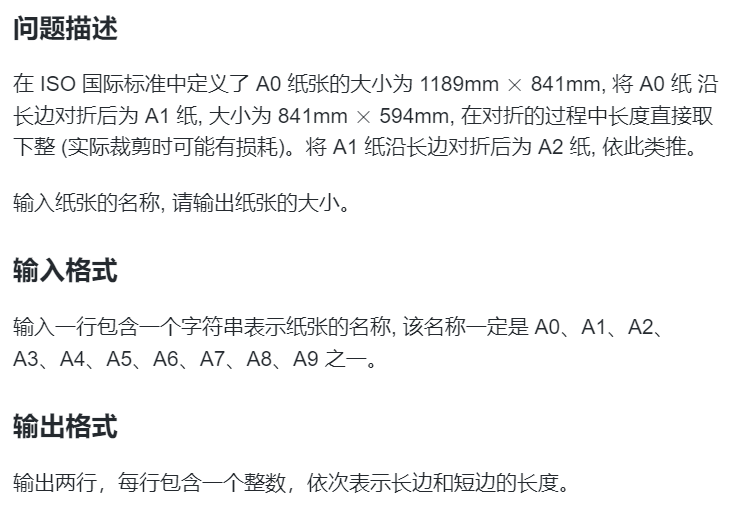

In [ ]:
papers = [(1189,841)]
# A0
a = 1189
b = 841
for i in range(9):
    # A1~A9
    # cut long side
    a = a//2
    # compare
    if b > a:
        temp = b
        b = a
        a = temp
    papers.append(tuple([a,b]))
# judge
instr = input()
index = int(instr[1])
print(papers[index][0])
print(papers[index][1])

### 试题 D：数位排序（10分）

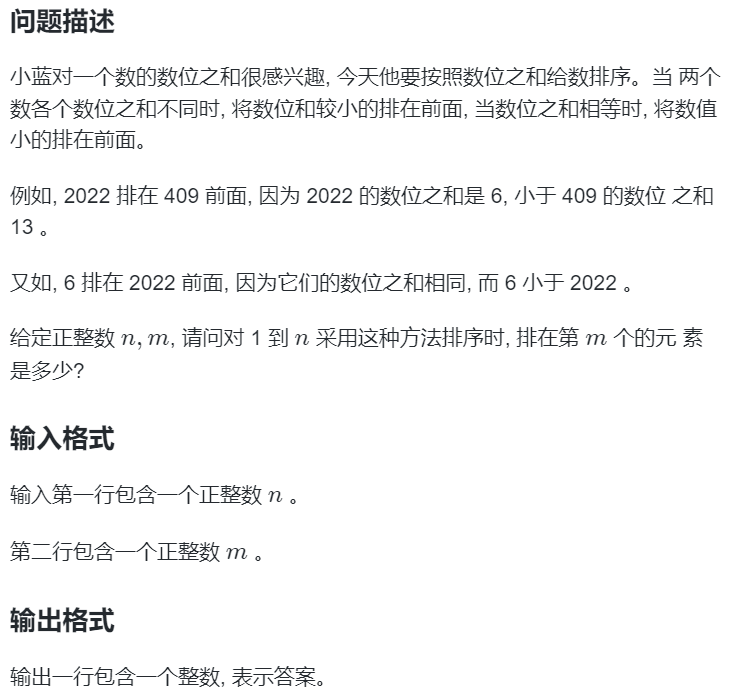

In [ ]:
# 直接用元组列表 34ms
nums = []
n = int(input())
m = int(input())
for i in range(1, n+1):
    nums.append((i,sum([int(j) for j in str(i)])))
print(sorted(nums, key = lambda nums: nums[1])[m-1][0])

In [ ]:
# 用元组列表做更方便，这里为了练习字典语法使用字典 40ms
from collections import defaultdict 
d = defaultdict(int)
n = int(input())
m = int(input())
# 初始化字典
for i in range(1,n+1):
    d[i] = sum([int(k) for k in str(i)])
print(sorted(d.items(), key = lambda item:item[1])[m-1][0])

### 试题 E：蜂巢（15分）
**问题描述：**\
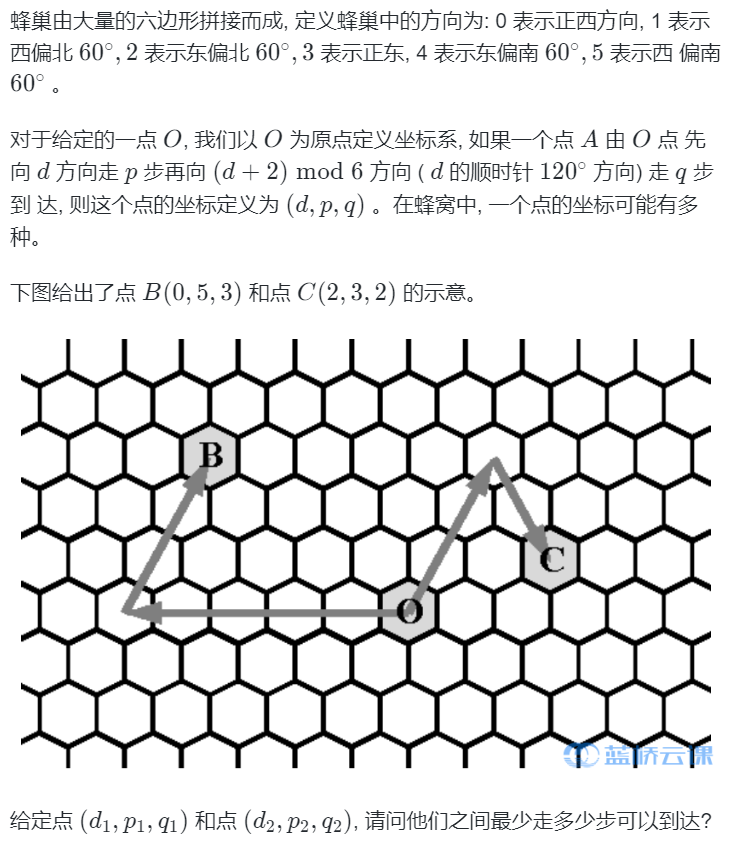

**输入格式：**
> 输入一行包含 6 个整数$d_1,p_1,q_1,d_2,p_2,q_2$表示两个点的坐标，相邻两个整数之间用空格隔开

**输出格式：**
> 输出一行包含一个整数表示两点之间最少走多少步可以到达。

**解题思路：**
> 题目中的坐标系是六边形，其中的移动过程会同时改变当前位置的横纵坐标，我们可以利用斜率将其完全转化成直角坐标系解决，这种方法虽然精确但并不一定符合六边形中的移动规律。更合理的方法是将其横纵坐标的转化法则进行更进一步的优化和抽象。\
观察可知对于左右两个相邻的方块，我们既可以直接向左（方向0），也可以先向左上方（方向1）移动一次，再向左下方（方向5）移动一次，由此可以总结出以下移动规律：\
0:(-1,0) 1:(-0.5,1) 2:(0.5,1) 3:(1,0) 4:(0.5,-1) 5:(-0.5,-1)

In [ ]:
d = [(-1.0,0.0),(-0.5,1.0),(0.5,1.0),(1.0,0.0),(0.5,-1.0),(-0.5,-1.0)]
d1,p1,q1,d2,p2,q2 = map(int,input().split())
x1 = p1*d[d1][0] + q1*d[(d1+2)%6][0]
y1 = p1*d[d1][1] + q1*d[(d1+2)%6][1]
x2 = p2*d[d2][0] + q2*d[(d2+2)%6][0]
y2 = p2*d[d2][1] + q2*d[(d2+2)%6][1]
# 计算二者之间的距离
dx = abs(x1-x2)
dy = abs(y1-y2)
if dy > 2*dx:
    print(int(dy))    # 可以斜向沿直线直达目标节点
else:
    print(int(dx+dy*0.5)) # 相当于仅从各段位移在横坐标上投影的角度分析步数，先横向移动到同一侧行，然后沿斜线

### 试题 F：消除游戏（15分）
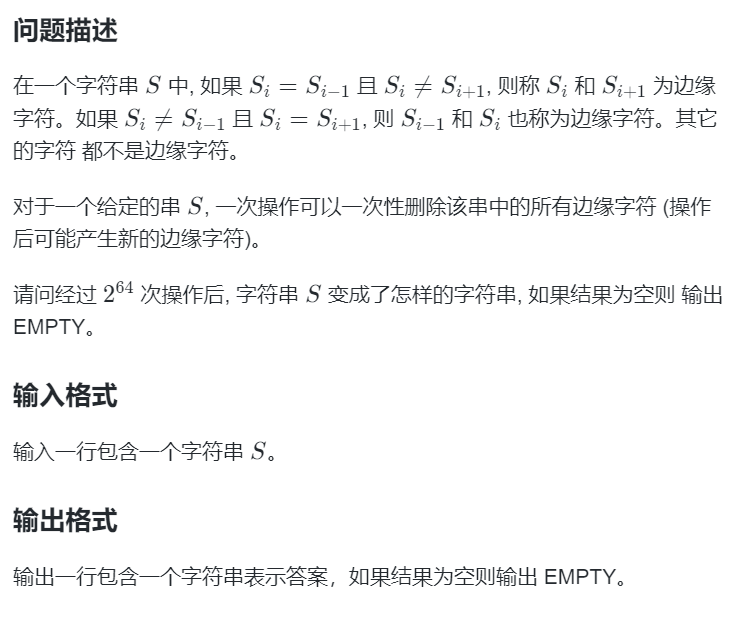

**解题思路：**
> 按照要求模拟循环删除过程，注意要将查找和删除操作分离，否则前面字符的删除可能会影响后续字符的检测。

In [ ]:
# 优化方案：创建新列表
# 优化一：避免反复使用del可以提升效率，append()拥有常数级别的时间复杂度
# 优化二：使用python中的set集合数据结构降低存储空间
s = [i for i in input()]
LOOP = 2**64
n = 0
for _ in range(LOOP):
    n = len(s)
    if n < 3:
        break
    changed = False
    record = set()
    for i in range(1,n-1):
        if s[i-1] == s[i] and s[i] != s[i+1]:
            record.add(i)
            record.add(i+1)
            changed = True
        elif s[i-1] != s[i] and s[i] == s[i+1]:
            record.add(i)
            record.add(i-1)
            changed = True
    if not changed:
        break
    else:
        # 将剩余元素组合成新的列表
        # 从前往后
        nextS = []
        for i in range(n):
            if i not in record:
                nextS.append(s[i])
        s = nextS.copy()
        record.clear()
# print

if n:
    print(''.join(s))
else:
    print('EMPTY')

In [ ]:
# 仍然有5个用例超时
# 用列表模拟双向链表
# 由于链表删除元素的时间复杂度为O(1)，可以将整个算法的时间复杂度降低为O(n)
# 创建两个列表分别存储左右指针
# 两边添加两个哨兵节点避免分类
s = '$'+input()+'$'
n = len(s)
left = [-1]*n
right = [-1]*n
deleted = [False]*n
LOOP = 2**64
# 初始化左右指针
for i in range(1,n-1):
    left[i] = i-1
    right[i] = i+1
record = set() # 记录本轮要删除的节点索引
for _ in range(LOOP):
    changed = False
    for i in range(1,n-1):
        if deleted[i] or s[left[i]] == '$' or s[right[i]] == '$':
            continue
        if s[left[i]] == s[i] and s[i] != s[right[i]]:
            record.add(i)
            record.add(right[i])
            changed = True
        elif s[left[i]] != s[i] and s[i] == s[right[i]]:
            record.add(i)
            record.add(left[i])
            changed = True
    if not changed:
        break
    else:
        # 删除指定节点
        for i in record:
            # delete
            if deleted[i]:
                continue
            else:
                left[right[i]] = left[i]
                right[left[i]] = right[i] 
            deleted[i] = True
        record.clear()
ans = ''
for i in range(n):
    if not deleted[i]:
        ans += s[i]
if ans:
    print(ans)
else:
    print('EMPTY')

### 试题 G：全排列的价值（15分）
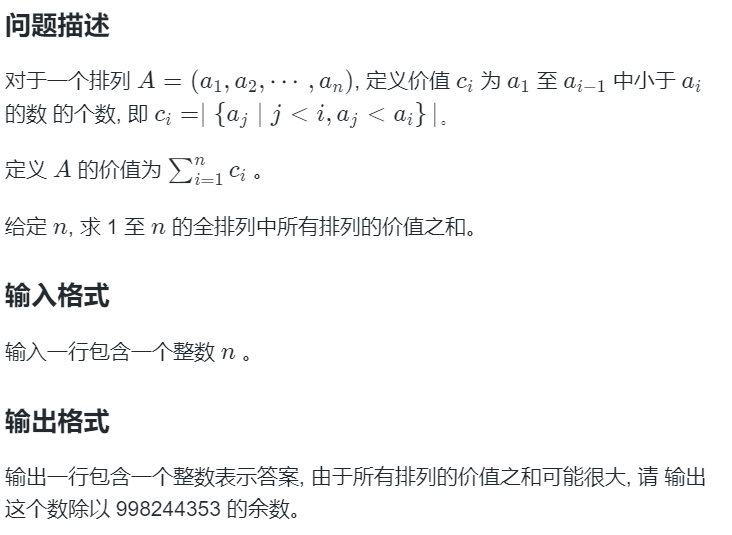

**解题思路：**
> 由数列的价值定义可知一个排列和它的逆序排列的价值之和是一个定值，这个定值只与全排列的长度有关。所以只需要求出排列的种类，然后乘以定值再除二就可以得到答案了。

In [ ]:
from math import ceil
n = int(input())
# 计算全排列的个数
count = 1
for i in range(2,n+1):
    count *= i
# 计算每一对全排列的价值之和
v = ((n-1)*n)//2 
print(((v*ceil(count))//2)%998244353) # 去除假设的一半反序排列

In [ ]:
MOD = 998244353
n = int(input())
v = n*(n-1)//2   # 因为n和n-1必定是一奇一偶，所以可以直接整除2
# 阶乘计算时需要及时取模，否则将会因为规模过大出现报错
count = v
# 跳过累乘2的步骤，相当于取阶乘的二分之一
for i in range(3, n+1):
    count *= i 
    count = count % MOD
print(count)

### 试题H 技能升级（20分）
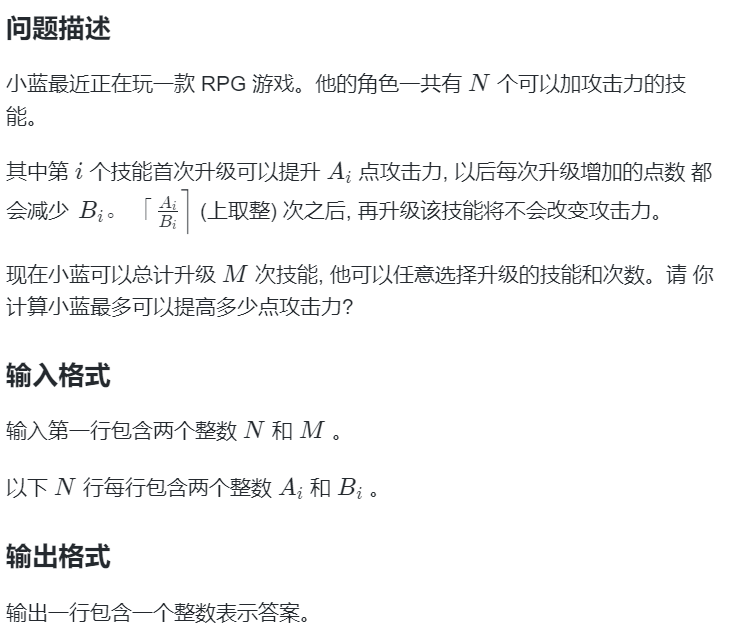

**解题思路：**
> 这是一个类似于完全背包问题的规划问题，但容量变成了可以选择的物品个数，而且同一种物品的价值随着数量的增加而减少，可以直接使用贪心算法解决。\
其中所谓 $\frac {A_i}{B_i}$向上取整次后不再提升攻击力说明当增量被减成负数以后再次升级攻击力将不会获得改变

In [ ]:
n,m = map(int,input().split())
a = []
b = []
for i in range(n):
    a_,b_ = map(int,input().split())
    a.append(a_)
    b.append(b_)

# 1、要获得最大攻击力则每次升级技能都需要升级提升攻击力最大的技能
# 2、最后一次升级技能提升的攻击力一定小于或等于前面升级技能提升的攻击力
# 3、每次升级技能则下次升级技能都会减少固定值，设每次升级技能提升的攻击力为a，升级后有 a=a-b
# 4、设最后一次升级技能提升的攻击力为mid，则当 a<mid 时，技能不会被升级，设技能被升级x次，则有 a - xb < mid
# 5、由4可求x，则可算出所有技能的x即求出所有技能被升级的次数，所有x相加，若小于m则说明mid大了，大于或等于m则说明mid小了
# 6、由以上可知，二分查找出mid可以知道每个技能升级的次数，则可知道升级某个技能获得的攻击力为：a+(a-b)+(a-2b)+...+[a-(n-1)b]=n*a+n*(n-1)*b/2
# 7、由6累加每个技能提升的攻击力可得提升的总攻击力
def check(mid):
    cnt = 0
    for i in range(n):
        if a[i] < mid:
            continue
        t = (a[i]-mid) // b[i] + 1
        cnt += t
        if cnt >= m:
            return True
    return False

# 二分枚举最后一次升级技能提升了多少攻击力
l = 0
r = 1000000
while l <= r:
    mid = (l+r)//2
    if check(mid):
        l = mid + 1
    else:
        r = mid - 1

attack = 0
surplus = m
for i in range(n):
    if a[i] < r:
        continue
    t = (a[i]-l) // b[i] + 1
    if a[i] - (t-1)*b[i] == r:
        t -= 1
    attack += a[i]*t - t*(t-1)*b[i] / 2
    surplus -= t # 可能surplus不为零，因为有的技能刚好提升了mid攻击力
print(int(attack) + surplus*r)

In [ ]:
# 标准解法 —— 二分法查找最后一次升级时所获得的提升
# 设最后一次升级的提升为 mid，所有小于 mid 的技能都不会被选择
# 由此可知对于特定技能，a - x*b < mid 其中x是该技能升级的次数
# 由上式可以计算出对于任意一个mid，各个技能的升级次数，如果升级的次数小于m，说明mid偏大；如果升级的总次数大于m说明mid偏小
# 由此我们可以用二分法求出mid的精确值，从而计算总提升
n,m = map(int,input().split())
a = [0]*n     # 初始增益
b = [0]*n     # 递减幅度
for i in range(n):
    a[i], b[i] = map(int,input().split())

# 计算特定mid下各个技能的升级总次数并比较其与m之间的大小关系
def getT(mid):
    global a,b,n,m
    ans = False
    count = 0
    for i in range(n):
        if a[i] < mid:
            continue
        else:
            # 注意答案要向上取整，因为如果x向下取整，可能会出现a - bx >= mid 从而漏掉一个解
            count += (a[i] - mid)//b[i] + 1 
            if count >= m:
                ans = True
                break
    return ans
# 二分法求mid的主体
left = 0
right = 1000000 # 根据A_i的数据范围可推知
while left < right:
    mid = (left + right)//2
    if getT(mid):
        # 升级数量太多，说明mid偏小
        left = mid
    else:
        right = mid - 1
# 利用最后一次增加的攻击力计算总提升量
ans = 0
number = m
for i in range(n):
    if a[i] < right:
        continue  # 没有添加的价值
    t = (a[i] - right)//b[i] + 1
    # 在计算升级次数时注意到值为mid的提升数量难以确定，不能直接算进t中，有一些值为mid的技能可能因为次数限制没有被选中
    if a[i] - (t-1)*b[i] == right:
        t -= 1
    ans += a[i]*t - b[i]*(t-1)*t//2   # 划分成a和b的等差数列之和两部分
    m -= t
print(ans + m*right)

In [ ]:
# 暴力代码，仍存在错误，只能通过少部分用例
n,m = map(int,input().split())
ab = [[0,0] for i in range(n)]
for i in range(n):
    ab[0], ab[1] = map(int,input().split())
# 需要对所有情况进行一个排序，找出前m个能够提升最多攻击力的升级方式
ans = 0

# 快速排序-递减序列-key是列表的第一个元素
def divide(left,right):
    global ab
    baseA = ab[left][0]
    baseB = ab[left][1]
    while left < right:
        while left < right and baseA >= ab[right][0]:
            right -= 1
        if left < right:
             ab[left][0] = ab[right][0]
             ab[left][1] = ab[right][1]
             left += 1
        while left < right and baseA <= ab[left][0]:
            left += 1
        if left < right:
            ab[right][0] = ab[left][0]
            ab[right][1] = ab[left][1]
            right -= 1
    ab[left][0] = baseA
    ab[left][1] = baseB
    return left
def quickSort(left,right):
    if left >= right:
        return
    mid = divide(left,right)
    quickSort(left, mid-1)
    quickSort(mid+1,right)
    return
quickSort(0,n-1)
for _ in range(m):
    if ab[0][0] == 0:
        # 已经无法提升了，直接退出
        break
    # 提升等级
    ans += ab[0][0]
    # 更新下一级的价值
    ab[0][0] -= ab[0][1]
    if ab[0][0] < 0:
        ab[0][0] = 0
   # 维护有序列表
    baseA = ab[0][0]
    baseB = ab[0][1]
    flag = False
    for i in range(1,n):
        if baseA < ab[i][0]:
            # 向后移动
            ab[i-1][0] = ab[i][0]
            ab[i-1][1] = ab[i][1]
        else:
            # 停止后移
            ab[i-1][0] = baseA
            ab[i-1][1] = baseB
            flag = True
            break
    # 注意对遍历到最后一位的情况进行特殊处理
    if not flag:
        ab[n-1][0] = baseA
        ab[n-1][1] = baseB
    print(ab)
print(ans)

### 试题I 最长不下降子序列
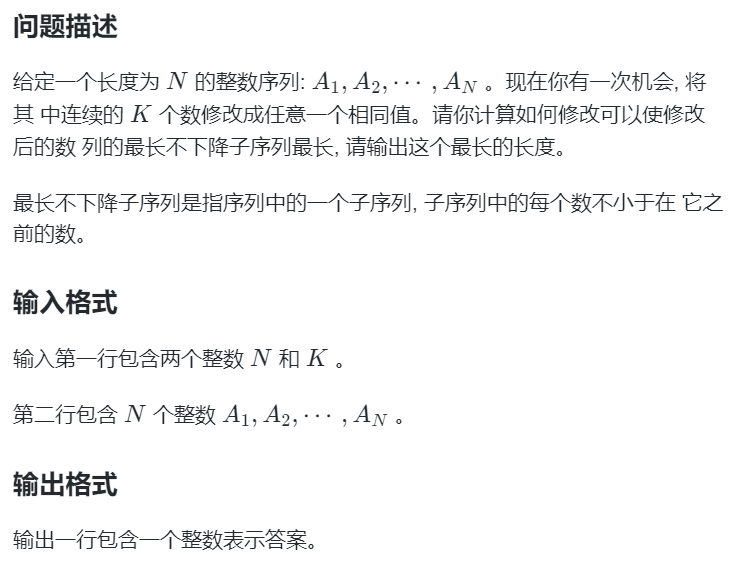

**解题思路：**
> 常规思路：用两个传统 dp 解决。从左到右维护每个位置 i 结尾的 最长不下降子序列，从右到左维护每个位置 j 结尾的 最长不上升子序列。最后枚举任意左右端点 i、j，中间大于等于 k 个数就更改这 k 数即可。

In [ ]:
# 经典暴力算法（存在纰漏，10%错误，20%通过，70%超时）
n,k = map(int,input().split())
a = [int(i) for i in input().split()]
left = [1]*n    # 记录[0,i]的最长不下降子序列
right = [1]*n   # 记录[n-1,i]的最长不上升子序列
# get left
for i in range(1,n):
    for j in range(i):
        if a[j] <= a[i]:
            left[i] = max(left[j], left[j]+1)
# get right
for i in range(n-2,-1,-1):
    for j in range(n-1,i,-1):
        if a[i] <= a[j]:
            right[i] = max(right[i], right[j]+1)
# 任意选取一对i，j二者之间相距小于k就加上二者的距离，若距离大于k就加上k
ans = 0
print(left)
print(right)
for i in range(n-k):
    for j in range(i+k,n):
        if a[i] > a[j]:
            continue
        temp = left[i] + right[j] + k
        ans = max(ans, temp)
print(ans)

### 试题J 最优清零方案（25分）
